# IoU

In [1]:
import os

PATH_TO_LABELS = os.path.join(os.getcwd(), 'exp29', 'labels')

In [2]:
def calculate_iou(bbox1, bbox2):
    x1, y1, w1, h1 = bbox1
    x2, y2, w2, h2 = bbox2
    x11 = x1 - w1 / 2
    y11 = y1 + h1 / 2
    x12 = x1 + w1 / 2
    y12 = y1 - h1 / 2
    x21 = x2 - w2 / 2
    y21 = y2 + h2 / 2
    x22 = x2 + w2 / 2
    y22 = y2 - h2 / 2
    x_new_1 = max(x11, x21)
    y_new_1 = min(y11, y21)
    x_new_2 = min(x12, x22)
    y_new_2 = max(y12, y22)
    if x_new_1 > x_new_2 or y_new_1 < y_new_2:
        return 0.0
    intersection = (x_new_2 - x_new_1) * (y_new_1 - y_new_2)
    union = w1 * h1 + w2 * h2 - intersection
    return intersection / union

def get_all_ious(file_path):
    with open(file_path, 'r') as f:
        bounding_boxes = []
        ious = []
        for line in f.readlines():
            _, x_center, y_center, w, h, _ = [float(s) for s in line.split()]
            bounding_boxes.append((x_center, y_center, w, h))
        for i1, bbox1 in enumerate(bounding_boxes):
            for i2, bbox2 in enumerate(bounding_boxes):
                if i1 != i2:
                    iou = calculate_iou(bbox1, bbox2)
                    if iou:
                        ious.append(iou)
    return ious

In [3]:
ious = []
for filename in os.listdir(PATH_TO_LABELS):
    ious.extend(get_all_ious(os.path.join(PATH_TO_LABELS, filename)))

In [4]:
import numpy as np

ious = np.array(ious)
x = np.linspace(0.02, 0.98)
y = np.quantile(ious, x)

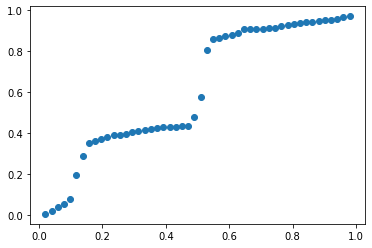

In [5]:
import matplotlib.pyplot as plt

plt.plot(x, y, 'o')

Поэтому возьмём порог по IoU между 0.2 и 0.5

Ещё посмотрим на распределение IoU по тем парам bounding box-ов, которые различаются по confidence не более, чем на 0.1:

In [6]:
def get_all_close_ious(file_path):
    with open(file_path, 'r') as f:
        bounding_boxes = []
        ious = []
        for line in f.readlines():
            _, x_center, y_center, w, h, conf = [float(s) for s in line.split()]
            bounding_boxes.append((x_center, y_center, w, h, conf))
        for i1, bbox1 in enumerate(bounding_boxes):
            for i2, bbox2 in enumerate(bounding_boxes):
                if i1 != i2:
                    iou = calculate_iou(bbox1[:-1], bbox2[:-1])
                    if iou and abs(bbox1[-1] - bbox2[-1]) <= 0.1:
                        ious.append(iou)
    return ious

In [7]:
close_ious = []
for filename in os.listdir(PATH_TO_LABELS):
    close_ious.extend(get_all_close_ious(os.path.join(PATH_TO_LABELS, filename)))

In [8]:
close_ious = np.array(close_ious)
x = np.linspace(0.02, 0.98)
y = np.quantile(close_ious, x)

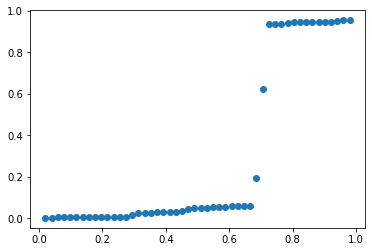

In [9]:
plt.plot(x, y, 'o')